# 🔄 GitHubモデルを活用した基本的なエージェントワークフロー (Python)

## 📋 ワークフローオーケストレーションチュートリアル

このノートブックでは、Microsoft Agent Frameworkの強力な**Workflow Builder**機能を紹介します。複雑なビジネスプロセスを処理し、複数のAI操作をシームレスに調整する高度なマルチステップエージェントワークフローの作成方法を学びます。

## 🎯 学習目標

### 🏗️ **ワークフローアーキテクチャ**
- **Workflow Builder**: 複雑なマルチステッププロセスを設計・オーケストレーション
- **イベント駆動型実行**: ワークフローイベントと状態遷移を処理
- **視覚的ワークフロー設計**: ワークフロー構造を作成・視覚化
- **GitHubモデル統合**: ワークフローコンテキスト内でAIモデルを活用

### 🔄 **プロセスオーケストレーション**
- **順次操作**: 複数のエージェントタスクを論理的順序で連結
- **条件付きロジック**: 分岐ワークフローと意思決定ポイントを実装
- **エラーハンドリング**: 強固なエラー回復とワークフローの耐久性
- **状態管理**: ワークフロー実行状態を追跡・管理

### 📊 **エンタープライズワークフローパターン**
- **ビジネスプロセス自動化**: 複雑な組織ワークフローを自動化
- **マルチエージェント調整**: 複数の専門エージェントを調整
- **スケーラブルな実行**: エンタープライズ規模の操作向けにワークフローを設計
- **監視と可観測性**: ワークフローのパフォーマンスと結果を追跡

## ⚙️ 前提条件とセットアップ

### 📦 **必要な依存関係**

ワークフロー機能を備えたAgent Frameworkをインストールします:

```bash
pip install agent-framework-core -U
```

### 🔑 **GitHubモデルの設定**

**環境設定 (.envファイル):**
```env
GITHUB_TOKEN=your_github_personal_access_token
GITHUB_ENDPOINT=https://models.inference.ai.azure.com
GITHUB_MODEL_ID=gpt-4o-mini
```

### 🏢 **エンタープライズユースケース**

**ビジネスプロセス例:**
- **顧客オンボーディング**: マルチステップの確認とセットアップワークフロー
- **コンテンツパイプライン**: コンテンツ作成、レビュー、公開の自動化
- **データ処理**: AIを活用したETLワークフロー
- **品質保証**: 自動テストと検証プロセス

**ワークフローの利点:**
- 🎯 **信頼性**: エラー回復を備えた決定論的実行
- 📈 **スケーラビリティ**: 高ボリュームのプロセス自動化を処理
- 🔍 **可観測性**: 完全な監査履歴と監視
- 🔧 **保守性**: 視覚的設計とモジュール型コンポーネント

## 🎨 ワークフローデザインパターン

### 基本的なワークフロー構造
```mermaid
graph TD
    A[Start] --> B[Agent Task 1]
    B --> C{Decision Point}
    C -->|Success| D[Agent Task 2]
    C -->|Failure| E[Error Handler]
    D --> F[End]
    E --> F
```

**主要コンポーネント:**
- **WorkflowBuilder**: 主なオーケストレーションエンジン
- **WorkflowEvent**: イベント処理と通信
- **WorkflowViz**: 視覚的ワークフロー表現とデバッグ

さあ、最初のインテリジェントワークフローを構築しましょう！ 🚀


In [1]:
! pip install agent-framework-core -U

In [2]:
# 🔄 Import Workflow and Agent Framework Components
# Core components for building sophisticated agent workflows

from agent_framework.openai import OpenAIChatClient    # 🤖 GitHub Models client integration
from agent_framework import WorkflowBuilder, WorkflowEvent, WorkflowViz  # 🏗️ Workflow orchestration tools

In [3]:
# 📦 Import Environment and System Utilities
# Essential libraries for configuration and environment management

import os                      # 🔧 Environment variable access
from dotenv import load_dotenv # 📁 Secure configuration loading

In [4]:
# 🔧 Initialize Environment Configuration
# Load GitHub Models API credentials from .env file
load_dotenv()

True

In [5]:
# 🔗 Initialize GitHub Models Chat Client for Workflow Operations
# Create the AI client that will power agents within our workflow
chat_client = OpenAIChatClient(
    base_url=os.environ.get("GITHUB_ENDPOINT"),    # 🌐 GitHub Models API endpoint
    api_key=os.environ.get("GITHUB_TOKEN"),        # 🔑 Authentication token
    model_id=os.environ.get("GITHUB_MODEL_ID")  # 🎯 Selected AI model
)

In [6]:
REVIEWER_NAME = "Concierge"
REVIEWER_INSTRUCTIONS = """
    You are an are hotel concierge who has opinions about providing the most local and authentic experiences for travelers.
    The goal is to determine if the front desk travel agent has recommended the best non-touristy experience for a traveler.
    If so, state that it is approved.
    If not, provide insight on how to refine the recommendation without using a specific example. 
    """

In [7]:
FRONTDESK_NAME = "FrontDesk"
FRONTDESK_INSTRUCTIONS = """
    You are a Front Desk Travel Agent with ten years of experience and are known for brevity as you deal with many customers.
    The goal is to provide the best activities and locations for a traveler to visit.
    Only provide a single recommendation per response.
    You're laser focused on the goal at hand.
    Don't waste time with chit chat.
    Consider suggestions when refining an idea.
    """

In [8]:
reviewer_agent   = chat_client.create_agent(
        instructions=(
           REVIEWER_INSTRUCTIONS
        ),
        name=REVIEWER_NAME,
    )

front_desk_agent = chat_client.create_agent(
        instructions=(
            FRONTDESK_INSTRUCTIONS
        ),
        name=FRONTDESK_NAME,
    )

In [9]:
workflow = WorkflowBuilder().set_start_executor(front_desk_agent).add_edge(front_desk_agent, reviewer_agent).build()

In [10]:

print("Generating workflow visualization...")
viz = WorkflowViz(workflow)
# Print out the mermaid string.
print("Mermaid string: \n=======")
print(viz.to_mermaid())
print("=======")
# Print out the DiGraph string.
print("DiGraph string: \n=======")
print(viz.to_digraph())
print("=======")
svg_file = viz.export(format="svg")
print(f"SVG file saved to: {svg_file}")

Generating workflow visualization...
Mermaid string: 
flowchart TD
  FrontDesk["FrontDesk (Start)"];
  Concierge["Concierge"];
  FrontDesk --> Concierge;
DiGraph string: 
digraph Workflow {
  rankdir=TD;
  node [shape=box, style=filled, fillcolor=lightblue];
  edge [color=black, arrowhead=vee];

  "FrontDesk" [fillcolor=lightgreen, label="FrontDesk\n(Start)"];
  "Concierge" [label="Concierge"];
  "FrontDesk" -> "Concierge";
}
SVG file saved to: C:\Users\kinfeylo\AppData\Local\Temp\tmpq947fo_v.svg


In [11]:
class DatabaseEvent(WorkflowEvent): ...

Attempting to display SVG file at: C:\Users\kinfeylo\AppData\Local\Temp\tmpq947fo_v.svg


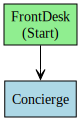

In [12]:
# Display the exported workflow SVG inline in the notebook

from IPython.display import SVG, display, HTML
import os

print(f"Attempting to display SVG file at: {svg_file}")

if svg_file and os.path.exists(svg_file):
    try:
        # Preferred: direct SVG rendering
        display(SVG(filename=svg_file))
    except Exception as e:
        print(f"⚠️ Direct SVG render failed: {e}. Falling back to raw HTML.")
        try:
            with open(svg_file, "r", encoding="utf-8") as f:
                svg_text = f.read()
            display(HTML(svg_text))
        except Exception as inner:
            print(f"❌ Fallback HTML render also failed: {inner}")
else:
    print("❌ SVG file not found. Ensure viz.export(format='svg') ran successfully.")


In [13]:
result =''
async for event in workflow.run_stream('I would like to go to Paris.'):
    if isinstance(event, DatabaseEvent):
        print(f"{event}")
    if isinstance(event, WorkflowEvent):
        result += str(event.data)
        # print(f"Workflow output: {event.data}")

In [14]:
result.replace("None", "")

'Visit the Louvre Museum for world-class art and historical masterpieces.While the Louvre is certainly an iconic destination, it can be quite touristy. To enhance the authenticity of your experience in Paris, consider recommending a lesser-known art space or gallery where you can appreciate local artists and their work. Additionally, exploring lesser-trodden neighborhoods or engaging with local artisans can provide a more genuine feel of Parisian culture. Aim for experiences that allow for personal interactions and deeper connections with the local community.While the Louvre is certainly an iconic destination, it can be quite touristy. To enhance the authenticity of your experience in Paris, consider recommending a lesser-known art space or gallery where you can appreciate local artists and their work. Additionally, exploring lesser-trodden neighborhoods or engaging with local artisans can provide a more genuine feel of Parisian culture. Aim for experiences that allow for personal inte


---

**免責事項**:  
この文書は、AI翻訳サービス[Co-op Translator](https://github.com/Azure/co-op-translator)を使用して翻訳されています。正確性を追求しておりますが、自動翻訳には誤りや不正確な部分が含まれる可能性があることをご承知ください。元の言語で記載された文書が正式な情報源とみなされるべきです。重要な情報については、専門の人間による翻訳を推奨します。この翻訳の使用に起因する誤解や誤解釈について、当方は一切の責任を負いません。
